In [16]:
import matplotlib.pyplot as plt
import numpy as np
import json
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load PR data
pr_data_gnn = np.load('../TemporalGNN/results/pr_curve_tgnn.npz')
pre_xg = np.load('../XGBoost/results/precision_xgboost.npy')
rec_xg = np.load('../XGBoost/results/recall_xgboost.npy')
pre_transformer = np.load('../Transformer/results/transformer_precision.npy')
rec_transformer = np.load('../Transformer/results/transformer_recall.npy')

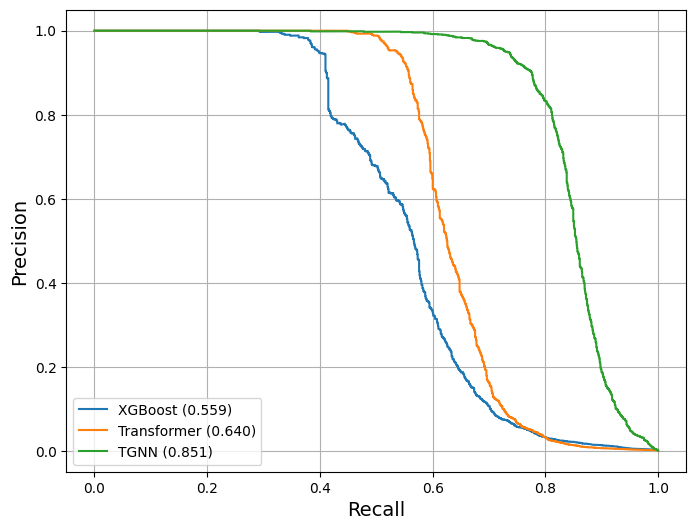

In [3]:
plt.figure(figsize=(8, 6))
plt.plot(rec_xg, pre_xg, label='XGBoost (0.559)')
plt.plot(rec_transformer, pre_transformer, label='Transformer (0.640)')
plt.plot(pr_data_gnn['recall'], pr_data_gnn['precision'], label=f'TGNN ({pr_data_gnn["pr_auc"]:.3f})')
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.legend()
plt.grid()
plt.savefig('../Figures/pr_curve_comparison.png', dpi=500)

In [4]:
# Training and validation error
with open('../TemporalGNN/results/training_metrics.json') as file:
    gnn_results = json.load(file)

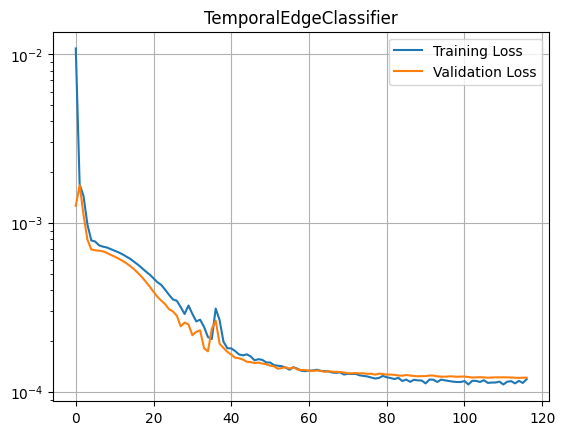

In [5]:
plt.semilogy(gnn_results['train_loss_history'], label='Training Loss')
plt.semilogy(gnn_results['val_loss_history'], label='Validation Loss')
plt.legend()
plt.grid()
plt.title('TemporalEdgeClassifier')
plt.savefig('../Figures/training_validation_loss_tgnn.png', dpi=500)

In [12]:
# test results
tgnn_test_results = np.load('../TemporalGNN/results/test_predictions.npy', allow_pickle=True).item()

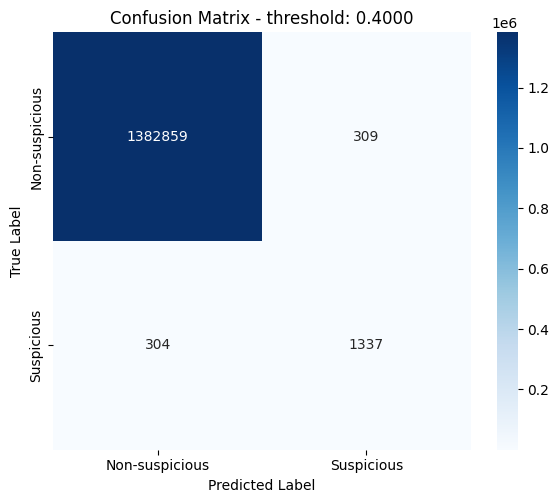

In [18]:
threshold = 0.4
labels = tgnn_test_results['labels']
probs = tgnn_test_results['probs']

# Calculate predictions using threshold
preds = (probs >= threshold).astype(int)
cm = confusion_matrix(labels, preds)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            square=True,
            xticklabels=['Non-suspicious', 'Suspicious'],
            yticklabels=['Non-suspicious', 'Suspicious'])
plt.title(f'Confusion Matrix - threshold: {threshold:.4f}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('../Figures/confusion_matrix_tgnn.png', dpi=500)